# XGBoost regression model - 2d deskriptori

In [4]:
import sys
sys.path.append('../src')
from modules import *

In [5]:
# Učitavanje CSV datoteke
data = pd.read_csv('../../data/solubility_new.csv')

In [6]:
data

,smiles,Solubility
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
2,CCC1CCC(CCC(=O)O)C1,-3.286116
3,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,-2.664549
4,O=C(OCCCOCCCOC(=O)c1ccccc1)c1ccccc1,-4.595503
...,...,...
3346,C[C@H]1CN(c2c(F)c(N)c3c(=O)c(C(=O)O)cn(C4CC4)c...,-3.370000
3347,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc([S+](C)[O-]...,-4.500000
3348,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000
3349,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000


In [7]:
# Pretvaranje SMILES zapisa u molekulu
mol_column=data.smiles.apply(Chem. MolFromSmiles).rename('mol', inplace=True)

In [8]:
# Pretvaranje molekula u numeričke značajke
logp=mol_column.apply(Descriptors.MolLogP).rename('logp', inplace=True) 
molwt=mol_column.apply(Descriptors.MolWt).rename('molwt', inplace=True) 
balabanj=mol_column.apply(Descriptors.BalabanJ).rename('balabanj', inplace=True) 
tpsa=mol_column.apply(Descriptors.TPSA).rename('tpsa', inplace=True)

In [9]:
final_data=pd.concat([data, mol_column, logp, molwt, balabanj, tpsa], axis=1) 
final_data.head(10) 

,smiles,Solubility,mol,logp,molwt,balabanj,tpsa
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd5077d0>,6.9541,312.606,2.998602,0.00
1,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507680>,2.4854,422.525,1.084427,56.60
2,CCC1CCC(CCC(=O)O)C1,-3.286116,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507840>,2.6775,170.252,2.145839,37.30
3,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,-2.664549,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507990>,0.5284,376.449,1.776978,115.06
4,O=C(OCCCOCCCOC(=O)c1ccccc1)c1ccccc1,-4.595503,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507df0>,3.4972,342.391,1.447050,61.83
5,CC(C)(C)c1ccc(OCC2CO2)cc1,-3.430239,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507450>,2.7617,206.285,1.961588,21.76
6,COCCCCC(=O)c1ccc(C(F)(F)F)cc1,-3.544060,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd5076f0>,3.7048,260.255,2.542670,26.30
7,CC(C)=CCC/C(C)=C\CO,-2.320601,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507530>,2.6714,154.253,3.544387,20.23
8,CCC(C)(CCC(C)C)C(=O)OCC1CO1,-3.513469,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507760>,2.7809,228.332,2.374960,38.83
9,CC(C)CCCCCOC(=O)CCS,-4.454382,<rdkit.Chem.rdchem.Mol object at 0x7fc4bd507a00>,3.0659,218.362,3.092076,26.30


In [10]:
final_data.describe()

,Solubility,logp,molwt,balabanj,tpsa
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,-3.447088,3.037575,299.859541,2.633169,60.594097
std,2.192194,2.834571,150.503923,0.899036,47.542862
min,-13.171900,-17.406400,92.141000,0.000000,0.000000
25%,-4.789493,1.538850,198.306000,1.957481,26.300000
50%,-3.286478,2.751300,275.348000,2.477208,52.320000
75%,-1.850000,4.103550,357.287500,3.151045,77.660000
max,2.137682,26.246600,2285.676000,7.517310,633.200000


In [11]:
final_data.isin([0]).sum()

smiles          0
Solubility      0
mol             0
logp            0
molwt           0
balabanj        1
tpsa          149
dtype: int64

In [12]:
final_data.isnull().sum()

smiles        0
Solubility    0
mol           0
logp          0
molwt         0
balabanj      0
tpsa          0
dtype: int64

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      3351 non-null   object 
 1   Solubility  3351 non-null   float64
 2   mol         3351 non-null   object 
 3   logp        3351 non-null   float64
 4   molwt       3351 non-null   float64
 5   balabanj    3351 non-null   float64
 6   tpsa        3351 non-null   float64
dtypes: float64(5), object(2)
memory usage: 183.4+ KB


In [14]:
final_data.to_csv('../../data/solubility_all_new_data.csv')

In [15]:
train_set,test_set=train_test_split(final_data,test_size=.2,random_state=42) 
train_set.shape, test_set.shape

((2680, 7), (671, 7))

In [16]:
# Odabir značajki i ciljne varijable
features = ['molwt', 'logp', 'balabanj', 'tpsa']
target = 'Solubility'


# Podijela podataka na skupove za treniranje, validaciju i testiranje
X_train, X_test, y_train, y_test = train_test_split(final_data[features], final_data[target], test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Treniranje XGBoost modela s ranom zaustavom
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)

# Predviđanje na testnom skupu
y_pred = model.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Squared Error: 1.3117292455726972
R2 Score: 0.711633267636135


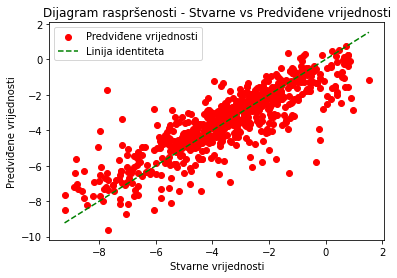

In [17]:
# Predviđanje na testnom skupu
y_pred = model.predict(X_test)

# Plotanje dijagrama raspršenosti
plt.scatter(y_test, y_pred, c='red', label='Predviđene vrijednosti')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', label='Linija identiteta')
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Dijagram raspršenosti - Stvarne vs Predviđene vrijednosti')

plt.legend()
plt.show()

In [18]:
# Definirajte raspon vrijednosti za parametre koje želite optimizirati
param_grid = {
    'n_estimators': [100, 101,102,103,104,105],
    'learning_rate': [0.10, 0.12,0.13,0.14,0.15],
    'max_depth': [1, 3, 5]
}

# Inicijalizirajte model koji želite optimizirati
model = xgb.XGBRegressor()

# Inicijalizirajte pretraživač po rešetci s modelom i parametrima
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Izvršite pretraživanje po rešetci na podacima za treniranje
grid_search.fit(X_train, y_train)

# Ispišite najbolje kombinacije parametara
print("Najbolji parametri:", grid_search.best_params_)

# Trenirajte model s najboljim parametrima na cijelom skupu za treniranje
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predviđanje na testnom skupu
y_pred = best_model.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Najbolji parametri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 104}
Mean Squared Error: 1.3169417518514732
R2 Score: 0.7104873654553991


In [19]:
target_name = "Solubility"
target = data[target_name]
target

0      -3.616127
1      -4.662065
2      -3.286116
3      -2.664549
4      -4.595503
          ...   
3346   -3.370000
3347   -4.500000
3348   -3.010000
3349   -2.930000
3350   -3.980000
Name: Solubility, Length: 3351, dtype: float64

In [20]:
data = final_data.drop(columns=[target_name,'smiles', 'mol'])
data.shape

(3351, 4)

In [21]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25
)
data_train.describe()

,logp,molwt,balabanj,tpsa
count,2513.000000,2513.000000,2513.000000,2513.000000
mean,3.014989,298.585649,2.637012,60.803908
std,2.850893,145.854948,0.900792,47.301138
min,-17.406400,92.141000,0.000000,0.000000
25%,1.501100,199.382000,1.957189,26.300000
50%,2.722800,275.348000,2.493171,52.600000
75%,4.113400,355.453000,3.153178,78.430000
max,26.246600,1297.128000,7.517310,633.200000


In [22]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=500, test_size=0.3, random_state=42)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error"
)

In [23]:
cv_results = pd.DataFrame(cv_results)
cv_results["test_error"] = -cv_results["test_score"]
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.009901,0.001094,-1.057187,1.057187
1,0.009974,0.001138,-1.073810,1.073810
2,0.009782,0.001129,-1.062879,1.062879
3,0.009615,0.001091,-1.062511,1.062511
4,0.009842,0.001139,-1.142788,1.142788
5,0.009578,0.001025,-1.093664,1.093664
6,0.009833,0.001055,-1.127182,1.127182
7,0.009759,0.001068,-1.092813,1.092813
8,0.009330,0.001024,-1.087842,1.087842
9,0.009576,0.001018,-1.091160,1.091160


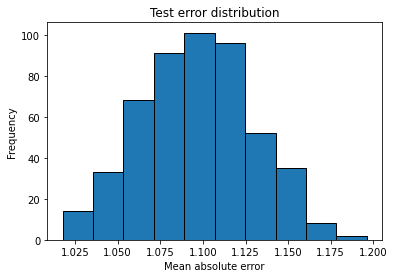

In [24]:
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Test error distribution")

In [25]:
print(
    "The mean cross-validated testing error is: "
    f"{cv_results['test_error'].mean():.2f}"
)
print(
    "The standard deviation of the testing error is: "
    f"{cv_results['test_error'].std():.2f}"
)

The mean cross-validated testing error is: 1.10
The standard deviation of the testing error is: 0.03


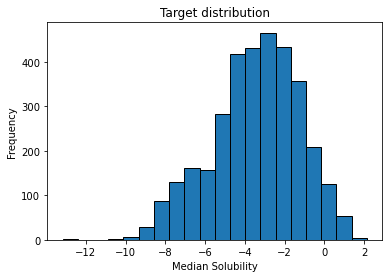

In [26]:
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median Solubility")
_ = plt.title("Target distribution")

/home/ivana/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


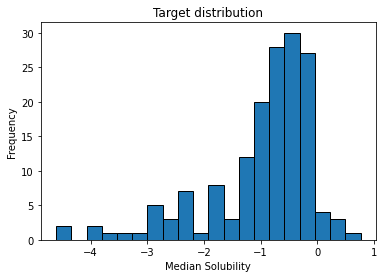

In [27]:
from sklearn.model_selection import ValidationCurveDisplay

max_depth = np.array([1, 5, 10, 15, 20, 25])
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="Maximum depth of decision tree",
    ylabel="Mean absolute error",
    title="Validate curve for decision tree",
)

KeyboardInterrupt: 